In [72]:
import pandas as pd

df_reviews = pd.read_excel(f"https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/data/out/Womens%20Clothing%20E-Commerce%20Reviews%20with%20Emotions.xlsx?raw=true")
df_reviews_raw = df_reviews.copy(deep=True)

df_reviews.dropna(inplace=True) 
df_reviews.reset_index(drop=True, inplace=True)

df_reviews.head()

,index,Review Title,Review Text,Review Rating,Review Positive Feedback Count,Review Polarity,Review Sentiment,Review Subjectivity,Review Length,Review Word Count,...,Reviewer Age,Reviewer Age Category,Emotion,Emotion Score,Division,Department,Product ID,Product Name,Product Category,Recommended?
0,1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0.550000,Positive,0.250000,124,22,...,50,45-54,Joy,0.972142,General Petite,Bottoms,1049,Product 1049,Pants,1
1,2,Flattering shirt,This shirt is very flattering to all due to th...,5,6,0.512891,Positive,0.137500,192,36,...,47,45-54,Joy,0.844207,General,Tops,847,Product 847,Blouses,1
2,3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,0.178750,Positive,0.066250,488,98,...,49,45-54,Joy,0.668897,General,Dresses,1080,Product 1080,Dresses,0
3,4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,0.215556,496,101,...,39,35-44,Joy,0.573683,General Petite,Tops,858,Product 858,Knits,1
4,5,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,4,0.171635,Positive,-0.007692,482,97,...,39,35-44,Joy,0.554208,General Petite,Tops,858,Product 858,Knits,1


In [61]:
og_reviews = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
og_reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [25]:
from sklearn.model_selection import train_test_split

df_reviews_train, df_reviews_val = train_test_split(df_reviews, test_size=0.2, random_state=42)

df_reviews_train = df_reviews_train.copy(deep=True)
df_reviews_val = df_reviews_val.copy(deep=True)

df_reviews_train.reset_index(drop=True, inplace=True)
df_reviews_val.reset_index(drop=True, inplace=True)

In [26]:
df_reviews_train['Emotion'].value_counts(normalize=True)

Emotion
Joy        0.901569
Sadness    0.082026
Anger      0.008559
Fear       0.007846
Name: proportion, dtype: float64

In [27]:

n = df_reviews_train.shape[0] // len(df_reviews_train['Emotion'].unique())
df_reviews_train = df_reviews_train.groupby("Emotion").sample(n=n, random_state=42, replace=True)
df_reviews_train.reset_index(drop=True, inplace=True)

In [28]:
df_reviews_train['Emotion'].value_counts()

Emotion
Anger      350
Fear       350
Joy        350
Sadness    350
Name: count, dtype: int64

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(encoding='utf-8', ngram_range=(1,2), stop_words=None, lowercase=False, max_df=1., min_df=10, max_features=300, norm='l2', sublinear_tf=True)
tfidf_features = tfidf_vectorizer.fit_transform(df_reviews_train['Review Text Wordcloud']).toarray()


In [30]:
pd.DataFrame(tfidf_features)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.219097,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.2167,0.000000,0.0,0.0,0.0,0.255693,0.0,0.0,0.410525,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0000,0.264608,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.557767
3,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.244544,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1396,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.235703,0.000000,0.0,0.0,0.0,0.0,0.000000
1397,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.220163,0.0,0.0,0.000000,0.132845,0.0,0.0,0.0,0.0,0.000000
1398,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [31]:

from sklearn.feature_selection import chi2
import numpy as np

emotions : list = ['Joy', 'Sadness', 'Fear', 'Anger']

def get_correlated_ngrams(emotion_code : int, y : pd.Series):

    features_chi2 = chi2(tfidf_features, y == emotion_code) # For the current emotion, use chi2 stats to evaluate the highest correlations with the target
    indices = np.argsort(features_chi2[0])[::-1] # np.argsort returns the indices that would sort the array ascending, [::-1] makes it descending with the highest correlation in first place
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())[indices] # get_feature_names uses the sorted indices to order the features most to least correlated with the target
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1] # Selects the feature names that are single words
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2] # Selects the feature names that are two words
    
    return unigrams, bigrams

for emotion in emotions:
    unigrams, bigrams = get_correlated_ngrams(emotion, df_reviews_train['Emotion'])
    
    print(f"{emotion}:")
    print(f"Most correlated unigrams: {', '.join(unigrams[:20])}")
    print(f"Most correlated bigrams: {', '.join(bigrams[:5])}\n")

Joy:
Most correlated unigrams: fits, great, comfortable, got, true, nice, pounds, love, perfect, bad, length, lay, petite, much, disappointed, across, pulled, though, bust, skirt
Most correlated bigrams: true size, runs slightly, need wear, dry clean, fabric bad

Sadness:
Most correlated unigrams: wanted, sad, disappointed, get, saw, like, pounds, great, wore, love, lay, size, even, much, material, received, first, would, across, still
Most correlated bigrams: need wear, runs slightly, going back, fabric bad, pounds usually

Fear:
Most correlated unigrams: across, pulled, shoulders, fear, squareapple, underlayer, types, si, narrow, done, space, slightly, romper, different, way, vest, chest, part, glad, guess
Most correlated bigrams: runs slightly, types fabric, since top, narrow shoulders, since stretch

Anger:
Most correlated unigrams: problem, strike, flat, pounds, idea, dressy, purchased, deep, zipper, mentioned, small, shows, appears, reviewers, lay, sheer, reviews, pants, cami, pi

In [32]:

X_train = pd.concat([df_reviews_train.iloc[:,[3,5]], pd.DataFrame(tfidf_features)], axis=1)
y_train = df_reviews_train['Emotion']

In [40]:

from sklearn.ensemble import RandomForestClassifier
X_train.columns = X_train.columns.astype(str)

TUNED_HYPER_PARAMS_500 : dict = {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}    

model = RandomForestClassifier()
model.set_params(**TUNED_HYPER_PARAMS_500, random_state=42)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [41]:

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy", verbose=10)
print(cv_results.mean(), cv_results.std())

[CV] START .....................................................................
[CV] END ................................ score: (test=0.971) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s


[CV] END ................................ score: (test=0.989) total time=   0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.979) total time=   0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.989) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.3s


[CV] END ................................ score: (test=0.982) total time=   0.3s
0.9821428571428571 0.006776309271789407


Accuracy: 0.9821428571428571


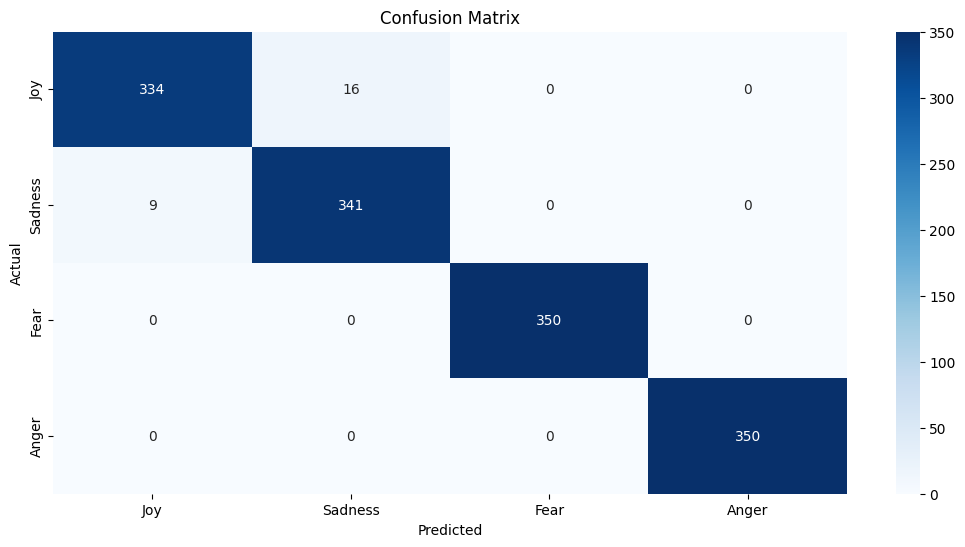

In [42]:
from typing import Tuple
import copy as cp
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    actual_classes = np.array([])
    predicted_classes = np.array([])

    splits = kfold.split(X)
    
    for train_ndx, test_ndx in splits:

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

    return actual_classes, predicted_classes

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

actual_classes, predicted_classes = cross_val_predict(model, kfold, X_train.to_numpy(), y_train.to_numpy())

print(f"Accuracy: {accuracy_score(actual_classes, predicted_classes)}")
plot_confusion_matrix(actual_classes, predicted_classes, emotions)

Accuracy: 0.9031339031339032


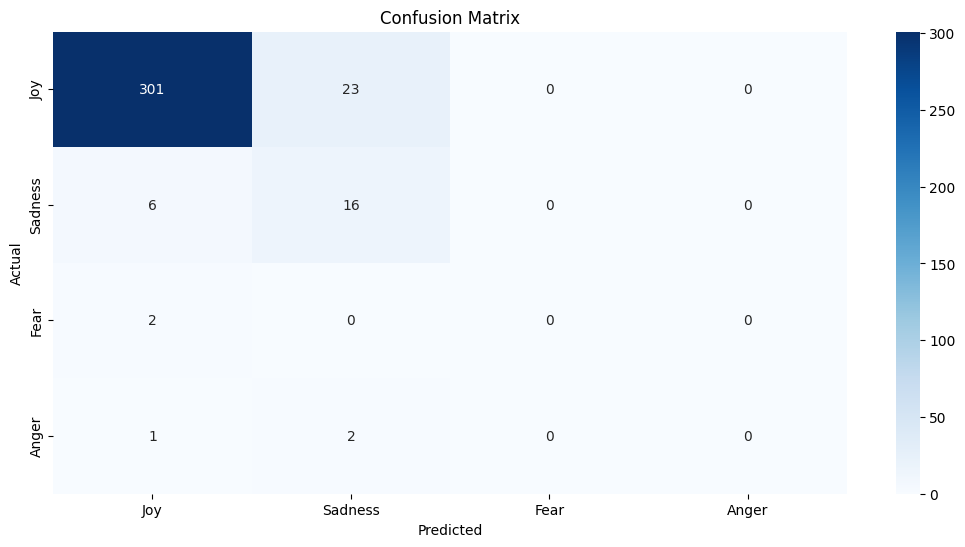

In [43]:
model.fit(X_train, y_train)

tfidf_features = tfidf_vectorizer.transform(df_reviews_val['Review Text Wordcloud']).toarray()

X_val = pd.concat([df_reviews_val.iloc[:,[3,5]], pd.DataFrame(tfidf_features)], axis=1)
y_val = df_reviews_val['Emotion']
X_val.columns = X_val.columns.astype(str)
actual_classes = y_val
predicted_classes = model.predict(X_val)

print(f"Accuracy: {accuracy_score(actual_classes, predicted_classes)}")
plot_confusion_matrix(actual_classes, predicted_classes, emotions)

In [62]:
X_val

,Review Rating,Review Polarity,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,5,0.265278,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.143545,0.0,0.0,0.0,0.000000,0.0
1,4,0.118583,0.0,0.0,0.0,0.0,0.000000,0.0,0.166268,0.0,...,0.0,0.252219,0.000000,0.252219,0.000000,0.0,0.0,0.0,0.000000,0.0
2,4,0.230000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,5,0.085308,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.127602,0.0,0.0,0.0,0.000000,0.0
4,5,0.222500,0.0,0.0,0.0,0.0,0.000000,0.0,0.244625,0.0,...,0.0,0.000000,0.000000,0.000000,0.198055,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,5,0.179167,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.182810,0.0
347,5,0.120563,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
348,4,0.355000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.314565,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
349,5,0.236667,0.0,0.0,0.0,0.0,0.266497,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [44]:
ALPHABETICAL_EMOTION_MAP : dict = {
                                  'Anger': 0,
                                  'Fear': 1,
                                  'Joy': 2,
                                  'Sadness': 3
                                  }

first_index = np.arange(len(predicted_classes))
second_index = pd.Series(predicted_classes).map(ALPHABETICAL_EMOTION_MAP).to_numpy()

predicted_proba = model.predict_proba(X_val)    
associated_proba = predicted_proba[first_index, second_index]

df_reviews_val["Predicted Emotion"] = predicted_classes
df_reviews_val["Predicted Emotion Score"] = associated_proba

df_reviews_val[['Emotion', 'Emotion Score', 'Predicted Emotion', 'Predicted Emotion Score']].head(10)


,Emotion,Emotion Score,Predicted Emotion,Predicted Emotion Score
0,Joy,0.796461,Joy,0.868333
1,Joy,0.702502,Joy,0.671066
2,Joy,0.855898,Joy,0.832500
3,Sadness,0.519885,Sadness,0.472960
4,Joy,0.664518,Joy,0.888750
5,Joy,0.615711,Joy,0.542575
6,Joy,0.615737,Joy,0.742984
7,Joy,0.686012,Joy,0.843750
8,Anger,0.541525,Sadness,0.612050
9,Joy,0.738641,Joy,0.856177


In [49]:
%%time
DATA_OUT_FOLDER : str = ""
TARGET_FULL_DATA_FILE : str = "Womens Clothing E-Commerce Reviews with All Emotions.xlsx"

df_reviews_prod = pd.read_excel("https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/data/out/Womens%20Clothing%20E-Commerce%20Reviews.xlsx?raw=true") # Read in the full source data file with 23k rows

tfidf_features = tfidf_vectorizer.transform(df_reviews_prod['Review Text Wordcloud']).toarray() # Predict the vectorized words from the word cloud

X_prod = pd.concat([df_reviews_prod.iloc[:,[3,5]], pd.DataFrame(tfidf_features)], axis=1) # Create the input features to the model as source data features 3 and 5 and the vectorized features
X_prod.columns = X_prod.columns.astype(str)

predicted_classes = model.predict(X_prod) # Predict the classes (emotional tones) for the full dataset

# Extract the probability of the predicted class from predicted_proba
first_index = np.arange(len(predicted_classes))
second_index = pd.Series(predicted_classes).map(ALPHABETICAL_EMOTION_MAP).to_numpy()

predicted_proba = model.predict_proba(X_prod) # Predcit the probabilities (of membership of each of the four classes) for the full dataset
associated_proba = predicted_proba[first_index, second_index]

df_reviews_prod['Emotion'] = predicted_classes # Update the target data with the predicted emotions
df_reviews_prod['Emotion Score'] = associated_proba # Update the target data with the associated probabilities (emotion scores)

df_reviews_prod.to_excel(f"{DATA_OUT_FOLDER}{TARGET_FULL_DATA_FILE}", index=False, sheet_name="reviews") # Write the transformed data to a new Excel spreadsheet (preserving the original)

<timed exec>:23: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).


Wall time: 16.8 s


In [50]:
# IBM Watson proportions ...
df_reviews_raw['Emotion'].value_counts(normalize=True, dropna=False) # df_reviews_raw is the output data from the last article with 2,000 calls into IBM Watson ...


Emotion
Joy        0.7940
NaN        0.1235
Sadness    0.0685
Anger      0.0075
Fear       0.0065
Name: proportion, dtype: float64

In [51]:
# Scratch-built tone analyzer proportions ...
df_reviews_prod['Emotion'].value_counts(normalize=True, dropna=False)# df_reviews_prod is our new output data with the scratch-built algorithm used to make emotional tone predictions for all 23,000 rows


Emotion
Joy        0.863835
Sadness    0.135016
Anger      0.000663
Fear       0.000486
Name: proportion, dtype: float64

# MY DATA

In [58]:
df = pd.read_csv("final/olivia-khan-academy-kids.csv")

In [59]:
df.head()

,date,developerResponse,review,rating,isEdited,title,userName
0,2023-01-27 09:48:46,"{'id': 34575065, 'body': 'We sincerely appreci...",Kahn Academy Kids is the best educational kids...,5,False,Wow! Just what my kids needed!,Triciaroseyrose
1,2021-01-01 16:18:30,"{'id': 20176204, 'body': ""It's exciting to hea...",My daughter(age 7) used Khan Academy in school...,5,False,A+ app for kids!,keeperofthecookies
2,2024-01-30 17:53:10,"{'id': 41714643, 'body': ""It's so exciting to ...",I have used this app for years with all 3 of m...,5,False,The Absolute Best,Zin468
3,2024-07-23 02:36:02,"{'id': 45577529, 'body': ""We're so pleased you...",I don’t even know where to start! I am so impr...,5,False,Absolutely blown away! They are partnered with...,tinabeanababy
4,2020-09-10 21:56:42,"{'id': 17878584, 'body': 'Our design team will...",My 4-year-old has been cruising through severa...,5,False,Very well-designed for actual learning,CrocoPhile


In [60]:
df_reviews.head()

,index,Review Title,Review Text,Review Rating,Review Positive Feedback Count,Review Polarity,Review Sentiment,Review Subjectivity,Review Length,Review Word Count,...,Reviewer Age,Reviewer Age Category,Emotion,Emotion Score,Division,Department,Product ID,Product Name,Product Category,Recommended?
0,1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0.550000,Positive,0.250000,124,22,...,50,45-54,Joy,0.972142,General Petite,Bottoms,1049,Product 1049,Pants,1
1,2,Flattering shirt,This shirt is very flattering to all due to th...,5,6,0.512891,Positive,0.137500,192,36,...,47,45-54,Joy,0.844207,General,Tops,847,Product 847,Blouses,1
2,3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,0.178750,Positive,0.066250,488,98,...,49,45-54,Joy,0.668897,General,Dresses,1080,Product 1080,Dresses,0
3,4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,0.133750,Positive,0.215556,496,101,...,39,35-44,Joy,0.573683,General Petite,Tops,858,Product 858,Knits,1
4,5,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,4,0.171635,Positive,-0.007692,482,97,...,39,35-44,Joy,0.554208,General Petite,Tops,858,Product 858,Knits,1


In [55]:
[df_reviews_val.iloc[:,[3,5]], pd.DataFrame(tfidf_features)]

[     Review Rating  Review Polarity
 0                5         0.265278
 1                4         0.118583
 2                4         0.230000
 3                5         0.085308
 4                5         0.222500
 ..             ...              ...
 346              5         0.179167
 347              5         0.120563
 348              4         0.355000
 349              5         0.236667
 350              5         0.254167
 
 [351 rows x 2 columns],
        0    1    2    3    4    5    6    7    8    9    ...  290  291  \
 0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 226

In [57]:
df_reviews_val.iloc[:,[3,5]]

,Review Rating,Review Polarity
0,5,0.265278
1,4,0.118583
2,4,0.230000
3,5,0.085308
4,5,0.222500
...,...,...
346,5,0.179167
347,5,0.120563
348,4,0.355000
349,5,0.236667


In [69]:
df_reviews['Review Text Wordcloud']

0       love love love jumpsuit fun flirty fabulous ev...
1       shirt flattering due adjustable front tie perf...
2       love tracy reese dresses one petite feet tall ...
3       aded basket hte last mintue see would look lik...
4       ordered carbon store pick ton stuff always try...
                              ...                        
1748    dress work art online person color vibrant per...
1749    ordered size small b fabric super soft fit gre...
1750    wanted fall love jacket xs retailer brands ord...
1751    got shorts colors bluegray redpink super light...
1752    beautiful shorts good length lots lower body c...
Name: Review Text Wordcloud, Length: 1753, dtype: object

In [71]:
%%time
DATA_OUT_FOLDER : str = ""
TARGET_FULL_DATA_FILE : str = ".csv"

#df_reviews_prod = df
tfidf_features = tfidf_vectorizer.transform(df_reviews_prod['Review Text Wordcloud']).toarray() # Predict the vectorized words from the word cloud

X_prod = pd.concat([df_reviews_prod.iloc[:,[3,5]], pd.DataFrame(tfidf_features)], axis=1) # Create the input features to the model as source data features 3 and 5 and the vectorized features
X_prod.columns = X_prod.columns.astype(str)

predicted_classes = model.predict(X_prod) # Predict the classes (emotional tones) for the full dataset

# Extract the probability of the predicted class from predicted_proba
first_index = np.arange(len(predicted_classes))
second_index = pd.Series(predicted_classes).map(ALPHABETICAL_EMOTION_MAP).to_numpy()

predicted_proba = model.predict_proba(X_prod) # Predcit the probabilities (of membership of each of the four classes) for the full dataset
associated_proba = predicted_proba[first_index, second_index]

df_reviews_prod['Emotion'] = predicted_classes # Update the target data with the predicted emotions
df_reviews_prod['Emotion Score'] = associated_proba # Update the target data with the associated probabilities (emotion scores)

df_reviews_prod.to_csv(f"{DATA_OUT_FOLDER}{TARGET_FULL_DATA_FILE}", index=False, sheet_name="reviews") # Write the transformed data to a new Excel spreadsheet (preserving the original)

KeyError: 'Review Text Wordcloud'

In [70]:
X_prod

,Review Rating,Review Polarity,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,4,0.633333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,5,0.339583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.240954,0.0,0.0,0.0,0.0,0.000000
2,3,0.073675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.218527,0.0,0.000000,0.0,0.0,0.0,0.0,0.272058
3,5,0.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,5,0.512891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22622,5,0.552667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
22623,3,0.091667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
22624,3,0.414286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.334122,0.0,0.0,0.0,0.0,0.000000
22625,3,0.322222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
